<a href="https://www.kaggle.com/code/rohinimaldhure/laptop-price-predictor-minor-project?scriptVersionId=153039483" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Laptop price prediction

#### Busniess Understanding

#### Laptop price prediction dataset is a collection of data that contains information about various laptops and their associated attributes, with the goal of predicting the price of laptops based on those attributes. This type of dataset is commonly used in machine learning and data analysis to build predictive models, often for tasks like pricing optimization, market analysis, or recommendation systems

#### Laptop Specifications: This includes detailed information about the laptops, such as the brand, model, processor type, RAM (Random Access Memory) size, storage capacity (e.g., HDD or SSD), graphics card, screen size, screen resolution, battery capacity, and weight. 

#### Price: This is the target variable that you want to predict. It represents the price of the laptop in a specific currency (e.g., US dollars, Euros, etc.). This is the value you aim to predict based on the other attributes

#### Several different factors can affect laptop computer prices. These factors include the brand of computer and the number of options and add-ons included in the computer package. In addition, the amount of memory and the speed of the processor can also affect pricing. 

#### Functionality is an important factor in determining laptop computer prices. A computer with more memory often performs better for a longer time than a computer with less memory. In addition, hard drive space is also crucial, and the size of the hard drive usually affects pricing. Many consumers may also look for digital video drivers and other types of recording devices that may affect the laptop computer prices.

#### Many consumers who are purchasing a new computer are buying an entire package. In addition to the computer itself, these systems typically include a monitor, keyboard, and mouse. Some packages may even include a printer or digital camera. The number of extras included in a computer package usually affects laptop computer prices.

![](https://www.notebookcheck.it/typo3temp/_processed_/e/0/csm_181004111903200301900006K_95047b6aab.jpg)

## Importing Libraries


In [1]:
import numpy as np # linear algebra
import pandas as pd# data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import random
random.seed(4)
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')



## Loading Data

In [2]:
df = pd.read_csv("/kaggle/input/laptop-data-price-predition/laptop_data.csv" , sep = "," , encoding = 'latin-1')

## Data Understanding

In [3]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [4]:
df.shape


(1303, 12)

In [5]:
df.columns

Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


## Data Cleaning

In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

### We don't have any null or duplicate values , amazing!

<font size="4">**Data Exploration and Visualization**</font>

**dropping Unnamed: 0**

In [9]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [10]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


 **Removing GB and converting it to numeric**
 
 **Removing kg and converting it to numeric** 

In [11]:
df['Ram'] =df['Ram'].str.replace('GB' ,'')
df['Weight'] =df['Weight'].str.replace('kg' ,'')  
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


**Coverting Ram into Integer Datatype** 

**Coverting Weight into Float Datatype** 

In [12]:
df['Ram']=df['Ram'].astype('int32')
df['Weight']=df['Weight'].astype('float32')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


<Axes: xlabel='Company'>

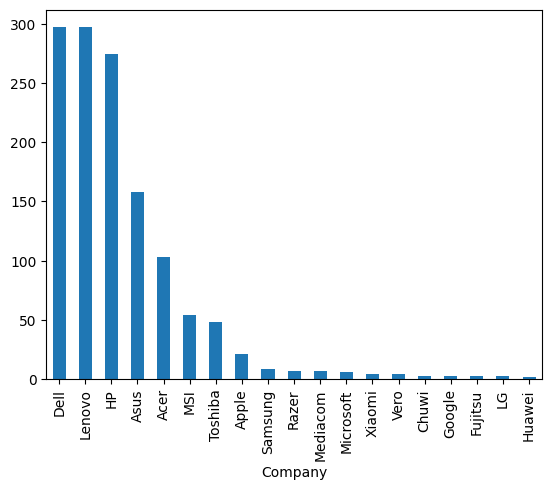

In [13]:
df['Company'].value_counts().plot(kind='bar')

**DELL laptops is the most sold** 

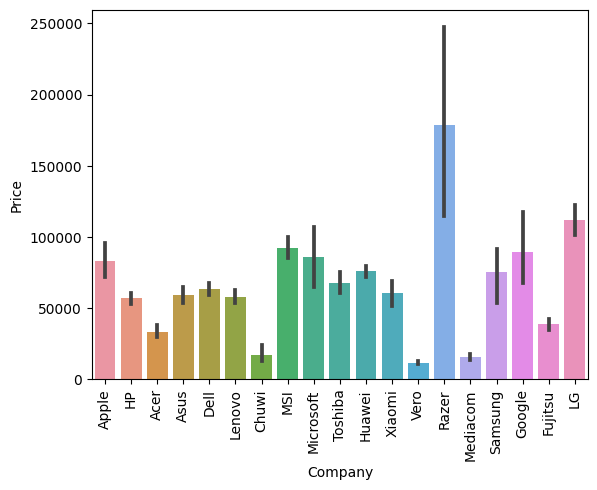

In [14]:
sns.barplot(x=df['Company'],y =df['Price'])
plt.xticks(rotation='vertical')
plt.show()

**compare the prices of different companies visually** 

**Razer is the most expensive brand** 


<Axes: xlabel='TypeName'>

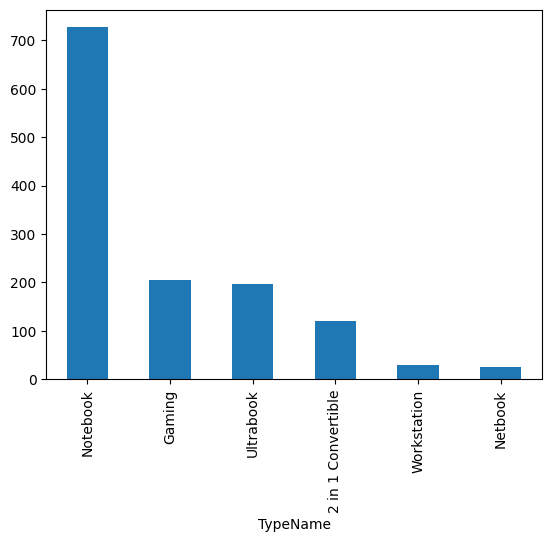

In [15]:
df['TypeName'].value_counts().plot(kind='bar')

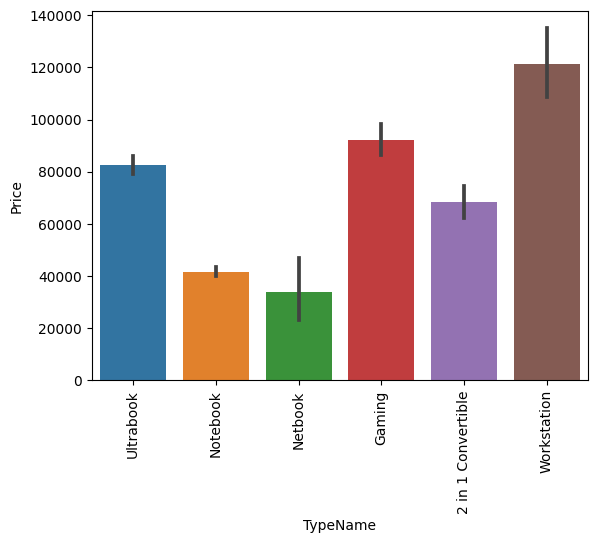

In [16]:
sns.barplot(x=df['TypeName'],y =df['Price'])
plt.xticks(rotation='vertical')
plt.show()

**compare the prices of different TypeName visually** 

**Workstation laptops are the most expensive** 


<Axes: xlabel='Inches', ylabel='Price'>

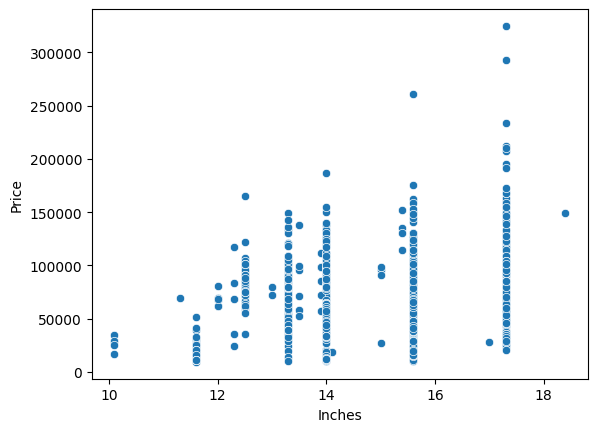

In [17]:
sns.scatterplot(x=df['Inches'] ,y=df['Price'])

**This type of plot helps you visualize how the 'Inches' and 'Price' variables are related,so  (inches) of a laptop increases, the price also increases.  it seems that there is a positive correlation between  inches of laptop  and its price**

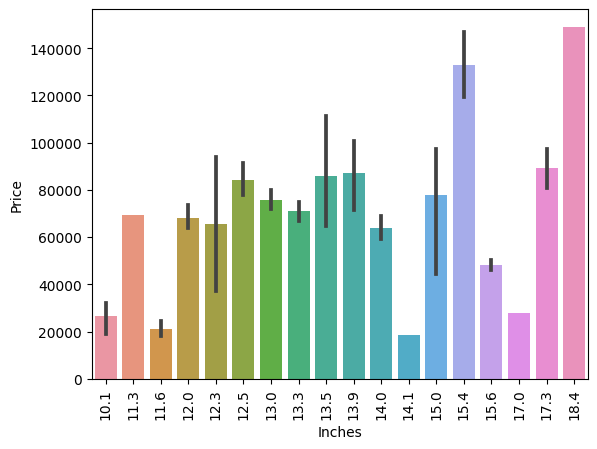

In [18]:
sns.barplot(x=df['Inches'] ,y=df['Price'])
plt.xticks(rotation ='vertical')
plt.show()

In [19]:
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

 **This is adding a new column 'Touchscreen' to your DataFrame df. This new column will contain binary values (1 or 0) based on whether the 'ScreenResolution' column contains the word 'Touchscreen' for each row**

In [20]:
df['Touchscreen']=df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen'in x else 0)
df.sample(10)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
35,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3350 1.1GHz,4,64GB Flash Storage,Intel HD Graphics 500,Windows 10,1.44,13266.7200,0
1217,Lenovo,Notebook,17.3,1600x900,Intel Core i5 7200U 2.5GHz,8,1TB HDD,Intel HD Graphics 620,No OS,2.80,28717.9200,0
704,Lenovo,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,4,500GB HDD,Intel HD Graphics 520,No OS,1.90,23976.0000,0
812,Samsung,Ultrabook,13.3,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,0.81,79866.7200,0
342,HP,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i3 7100U 2.4GHz,8,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.10,38148.4800,0
1067,Dell,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.62,42517.9728,1
1202,Dell,2 in 1 Convertible,15.6,Full HD / Touchscreen 1920x1080,Intel Core i7 8550U 1.8GHz,16,512GB SSD,Intel UHD Graphics 620,Windows 10,2.00,68464.8000,1
1154,Dell,Notebook,15.6,IPS Panel Touchscreen / 4K Ultra HD 3840x2160,Intel Core i5 6300HQ 2.3GHz,8,256GB SSD,Nvidia GeForce 960M,Windows 10,2.04,119916.2304,1
1266,HP,Notebook,15.6,Full HD 1920x1080,AMD A9-Series 9410 2.9GHz,6,1.0TB Hybrid,AMD Radeon R7 M440,Windows 10,2.04,29303.4672,0
920,Dell,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,4,1TB HDD,AMD Radeon R5 M420,Windows 10,2.18,36496.2672,0


**If 'Touchscreen' is found in that value, a 1 will be assigned to the 'Touchscreen' column for that row; otherwise, it will be assigned 0** 

<Axes: xlabel='Touchscreen'>

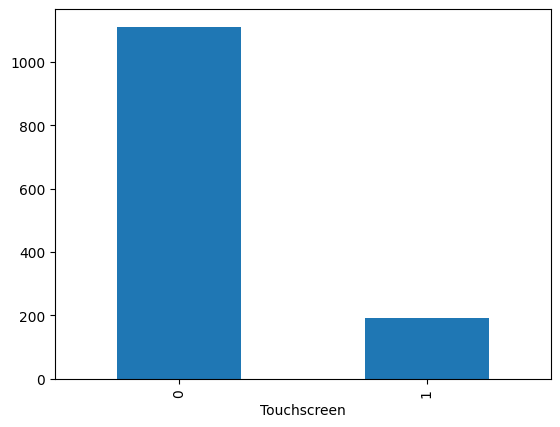

In [21]:
df['Touchscreen'].value_counts().plot(kind ='bar')

**This plot shows number of touch screen laptop are less and non Touch Screen laptop are more**

<Axes: xlabel='Touchscreen', ylabel='Price'>

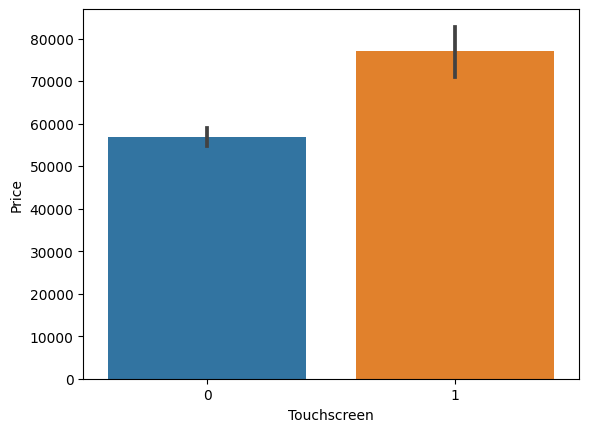

In [22]:
sns.barplot(x= df['Touchscreen'],y = df['Price'])

**This can help to visually compare the average prices of laptop with and without touchscreens, and show  how the presence of a touchscreen may affect the price of products in your datasetn , we can say that  price of laptop with a touchscreen is significantly higher than the  price of products without a touchscreen, it suggests that the presence of a touchscreen is affect with higher prices**

 **This adds a new column called 'IPS' to your DataFrame df. This new column contains binary values (1 or 0) based on whether the 'ScreenResolution' column for each row contains the term 'IPS' or not.If 'IPS' is found in that value, a 1 is assigned to the 'IPS' column for that row; otherwise, it is assigned 0**

In [23]:
df['IPS']=df['ScreenResolution'].apply(lambda x:1 if 'IPS'in x else 0)
df.sample(10)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS
228,Asus,Notebook,17.3,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD + 500GB HDD,Nvidia GeForce GTX 950M,Windows 10,2.69,47472.4800,0,0
501,HP,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,8,256GB SSD,AMD Radeon 520,Windows 10,1.91,32979.7872,0,0
643,Asus,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,1TB HDD,Nvidia GeForce GTX 1050 Ti,No OS,2.50,62284.3200,0,1
1162,HP,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.62,47898.7200,0,1
1197,Asus,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16,512GB SSD + 1TB HDD,Nvidia GeForce GTX 980M,Windows 10,4.30,114552.0000,0,1
1081,Lenovo,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 6820HK 2.7GHz,32,512GB SSD + 1.0TB Hybrid,Nvidia GeForce GTX 980M,Windows 10,4.60,172627.2000,0,1
113,HP,Notebook,14.0,IPS Panel 1366x768,Intel Core i5 8250U 1.6GHz,4,500GB HDD,Intel UHD Graphics 620,Windows 10,1.63,38468.1600,0,1
257,HP,Notebook,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16,1TB HDD,Nvidia GeForce MX150,Windows 10,2.90,56423.5200,0,1
1214,Asus,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,2.90,103842.7200,0,0
394,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,AMD Radeon R7 M445,Linux,2.33,41498.1936,0,0


<Axes: xlabel='IPS'>

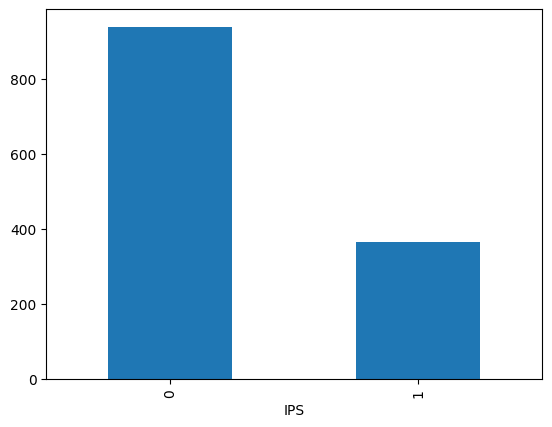

In [24]:
df['IPS'].value_counts().plot(kind ='bar')

<Axes: xlabel='IPS', ylabel='Price'>

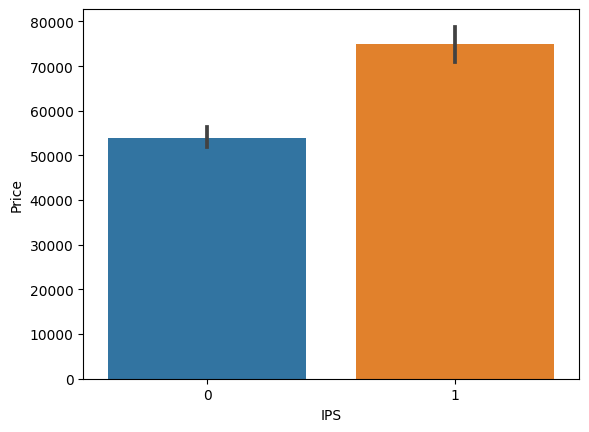

In [25]:
sns.barplot(x= df['IPS'],y = df['Price'])

 **this is splitting the 'ScreenResolution' column in your DataFrame df into two separate columns, 'x_res' and 'y_res'**

In [26]:
new = df["ScreenResolution"].str.split('x', n=1, expand=True)
df['x_res']=new[0]
df['y_res']=new[1]
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,x_res,y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,IPS Panel Retina Display 2560,1600


In [27]:
df['x_res']= df['x_res'].str.replace(' , ', ' ').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,x_res,y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


**str.replace() method to replace any occurrences of ' , ' in the 'x_res' column with a space (' '),method , with a regular expression (r'(\d+\.?\d+)') to extract numerical values from the modified 'x_res' column, This lambda function extracts the first element from the list**

In [28]:

df['x_res']=df['x_res'].astype('int')
df['y_res']=df['y_res'].astype('int')


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  x_res             1303 non-null   int64  
 14  y_res             1303 non-null   int64  
dtypes: float32(1), float64(2), int32(1), int64(4), object(7)
memory usage: 142.6+ KB


In [30]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,x_res,y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [31]:
print(df.corr(numeric_only=True))

               Inches       Ram    Weight     Price  Touchscreen       IPS  \
Inches       1.000000  0.237993  0.827631  0.068197    -0.361735 -0.114804   
Ram          0.237993  1.000000  0.383874  0.743007     0.116984  0.206623   
Weight       0.827631  0.383874  1.000000  0.210370    -0.294620  0.016967   
Price        0.068197  0.743007  0.210370  1.000000     0.191226  0.252208   
Touchscreen -0.361735  0.116984 -0.294620  0.191226     1.000000  0.150512   
IPS         -0.114804  0.206623  0.016967  0.252208     0.150512  1.000000   
x_res       -0.071245  0.433121 -0.032880  0.556529     0.351066  0.281457   
y_res       -0.095404  0.424437 -0.053846  0.552809     0.357930  0.289030   

                x_res     y_res  
Inches      -0.071245 -0.095404  
Ram          0.433121  0.424437  
Weight      -0.032880 -0.053846  
Price        0.556529  0.552809  
Touchscreen  0.351066  0.357930  
IPS          0.281457  0.289030  
x_res        1.000000  0.994219  
y_res        0.994219  1.

**calculate PPI 
 Pixels per Inch (PPI): PPI is a measure of the pixel density on a screen or monitor**

In [32]:
df['ppi'] = (((df['x_res']**2)+(df['y_res']**2))**0.5/df['Inches']).astype('float')
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,x_res,y_res,ppi
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005


In [33]:
correlation = df['ppi'].corr(df['Price'])
print(correlation)

0.4734873076608601


In [34]:
df.drop(columns=['ScreenResolution'],inplace =True)
df.head()


,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,x_res,y_res,ppi
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005


In [35]:
df.drop(columns=['Inches' ,'x_res' ,'y_res'],inplace =True)
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


**The code  provided to be adding a new column 'Cpu_name' to your DataFrame 'df' by splitting the values in the 'Cpu' column and joining the first three words**

In [36]:
df['Cpu_name']=df['Cpu'].apply(lambda x: " ".join(x.split()[0:3]))

df.sample(10)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu_name
1005,HP,Notebook,Intel Core i5 6300U 2.4GHz,4,256GB SSD,Intel HD Graphics 520,Windows 10,1.48,58607.4672,0,0,111.935204,Intel Core i5
360,HP,Notebook,Intel Core i3 6006U 2GHz,4,500GB HDD,Intel HD Graphics 520,Windows 10,1.86,23389.9200,0,0,100.454670,Intel Core i3
1067,Dell,2 in 1 Convertible,Intel Core i7 6500U 2.5GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.62,42517.9728,1,0,165.632118,Intel Core i7
319,Acer,Notebook,Intel Pentium Quad Core N3710 1.6GHz,4,128GB Flash Storage,Intel HD Graphics 405,Windows 10,1.40,25840.8000,0,0,135.094211,Intel Pentium Quad
1104,Lenovo,Gaming,Intel Core i7 7700HQ 2.8GHz,16,512GB SSD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.40,63882.7200,0,0,141.211998,Intel Core i7
814,Dell,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,AMD Radeon R5 M420,Windows 10,2.18,42081.0768,0,0,141.211998,Intel Core i5
959,Acer,2 in 1 Convertible,Intel Celeron Dual Core N3060 1.6GHz,4,32GB Flash Storage,Intel HD Graphics 400,Chrome OS,1.25,20725.9200,1,1,135.094211,Intel Celeron Dual
965,Dell,Notebook,Intel Core i3 6006U 2.0GHz,4,1TB HDD,AMD Radeon R5 M430,Linux,2.25,24808.2336,0,0,100.454670,Intel Core i3
416,Dell,Notebook,Intel Core i3 6006U 2GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.65,36709.9200,0,0,117.826530,Intel Core i3
917,MSI,Gaming,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.70,85194.7200,0,0,127.335675,Intel Core i7


 *****In this Python function called fetch_processor that takes a single argument 'text'*****
 
 ****If text is equal to 'Intel Core i5', 'Intel Core i7', or 'Intel Core i3', it returns text****
 
 ****If text is not one of the above Intel processor names and the first word in text (obtained using text.split()[0])  is equal to the string 'Intel', it returns 'other Intel Processor'****
 
 ****If none of the above conditions are met, it returns 'AMD Processor'****


In [37]:
def fetch_processor(text):
    if text =='Intel Core i5'or text == 'Intel Core i7' or text =='Intel Core i3':
     return text
    else:
        if text.split()[0] == 'Intel':
         return 'other Intel Processor'
        else:
         return  'AMD Processor'
    

****This code takes each value in the 'Cpu_name' column, applies the fetch_processor function to it, and stores the result in a new column 'cpu brand'. The fetch_processor function categorizes CPU names based on the conditions you've defined****

In [38]:
df['cpu brand']=df['Cpu_name'].apply(fetch_processor)
df.sample(5)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu_name,cpu brand
89,Dell,Ultrabook,Intel Core i7 8550U 1.8GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.21,87858.7200,0,1,165.632118,Intel Core i7,Intel Core i7
695,Acer,Netbook,Intel Celeron Dual Core N3050 1.6GHz,4,32GB Flash Storage,Intel HD Graphics,Windows 10,1.40,14332.3200,0,0,135.094211,Intel Celeron Dual,other Intel Processor
587,Lenovo,Ultrabook,Intel Core i7 6600U 2.6GHz,12,256GB SSD,Intel HD Graphics 520,Windows 10,1.40,89137.4400,0,1,157.350512,Intel Core i7,Intel Core i7
1281,Dell,Notebook,Intel Core i7 7500U 2.7GHz,8,1TB HDD,AMD Radeon R5 M430,Linux,2.30,42943.1472,0,0,100.454670,Intel Core i7,Intel Core i7
438,Lenovo,Ultrabook,Intel Core i7 7500U 2.7GHz,24,512GB SSD,Intel HD Graphics 620,Windows 10,1.32,126912.9600,0,0,209.800683,Intel Core i7,Intel Core i7


In [39]:
df['cpu brand'].value_counts()

cpu brand
Intel Core i7            527
Intel Core i5            423
other Intel Processor    154
Intel Core i3            136
AMD Processor             63
Name: count, dtype: int64

****This barplot show intel i7 have highest price as compared to other****

<Axes: xlabel='cpu brand', ylabel='Price'>

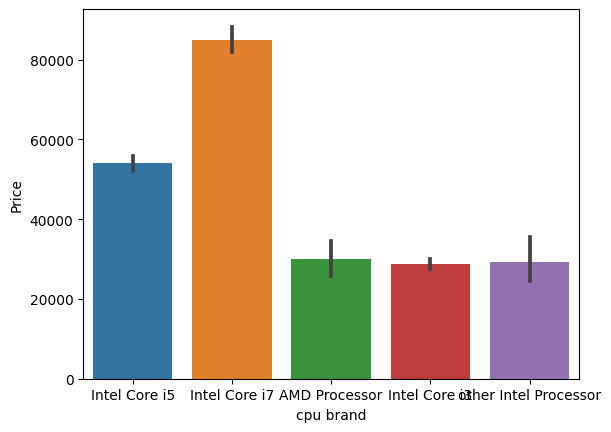

In [40]:
sns.barplot(x= df['cpu brand'],y = df['Price'])

In [41]:
df.drop(columns=['Cpu' ,'Cpu_name'],inplace =True)
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,cpu brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


****This bar show 8 gb ram are most sold****

<Axes: xlabel='Ram'>

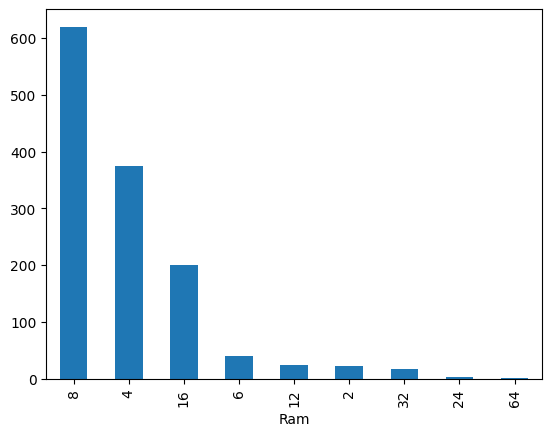

In [42]:
df['Ram'].value_counts().plot(kind = 'bar')

****This bar plot to visualize the relationship between RAM size and price, and the highest price is associated with 64GB of RAM.it means RAM size increases, the price also increases. This positive relationship between RAM size and price is a common observation, as you move to smaller RAM sizes, the price tends to decrease****

<Axes: xlabel='Ram', ylabel='Price'>

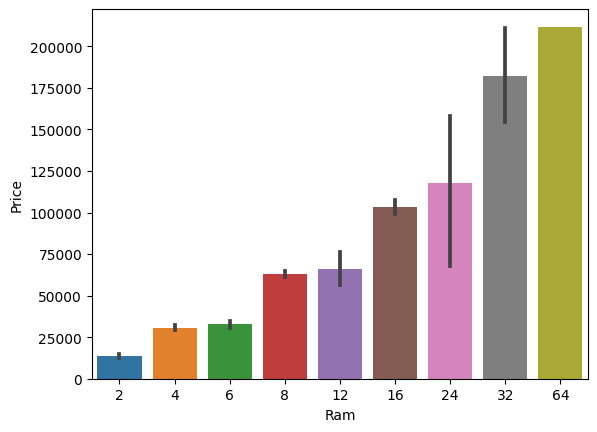

In [43]:
sns.barplot(x= df['Ram'],y = df['Price'])

In [44]:
df['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [45]:
#The code first converts the 'Memory' column to strings, removes any trailing '.0', and removes 'GB' and 'TB' units.
#Then, it splits the 'Memory' column into two parts using the '+' character and stores them in the 'first' and 'second' columns.

df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
new = df["Memory"].str.split("+", n = 1, expand = True)

#The code assigns the values of new[0] to the "first" column of the DataFrame df. Then, it uses the str.strip() method to remove any leading or trailing whitespace from the values in the "first" column.
#Next, it assigns the values of new[1] to the "second" column of the DataFrame df.

df["first"]= new[0]
df["first"]=df["first"].str.strip()

df["second"]= new[1]

#It creates binary indicator columns (e.g., "Layer1HDD," "Layer1SSD," "Layer1Hybrid," "Layer1Flash_Storage") based on the presence of certain keywords 
#("HDD," "SSD," "Hybrid," "Flash Storage") in the "first" column. 
#If a keyword is present in a cell of the "first" column, the corresponding binary indicator column is set to 1; otherwise, it's set to 0.


df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

#It removes all non-numeric characters from the "first" column, effectively leaving only the numeric values. 
#This is done using the regular expression r'\D', which matches any character that is not a digit.

df['first'] = df['first'].str.replace(r'\D', '')

#It fills any missing values in the "second" column with the string "0" using the fillna method. 

df["second"].fillna("0", inplace = True)

#Similar to step 1, it creates binary indicator columns (e.g., "Layer2HDD," "Layer2SSD," "Layer2Hybrid," "Layer2Flash_Storage") 
#based on the presence of keywords in the "second" column.

df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

#It removes all non-numeric characters from the "Second" column
df['second'] = df['second'].str.replace(r'\D', '')

#it extracts the numeric part from each cell, removing any non-numeric characters.
#After extracting the numeric values, you are using astype(int) to convert these extracted values into integers. 

df['first'] = df['first'].str.extract('(\d+)').astype(int)
df['second'] = df['second'].str.extract('(\d+)').astype(int)

#sums up the HDD capacities from both "first" and "second" columns, depending on the presence of HDD indicators.
#sums up the SSD capacities from both "first" and "second" columns, depending on the presence of HDD indicators.
#sums up the Hybrid capacities from both "first" and "second" columns, depending on the presence of HDD indicators.
#sums up the Flash_Storage capacities from both "first" and "second" columns, depending on the presence of HDD indicators.


df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

#Drops the intermediate columns that were used for processing ('first', 'second', and the binary indicator columns).

df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,cpu brand,HDD,SSD,Hybrid,Flash_Storage
1066,Asus,Gaming,64,1000 SSD,Nvidia GeForce GTX 980,Windows 10,3.58,211788.0000,0,1,127.335675,Intel Core i7,0,1000,0,0
477,Lenovo,Notebook,8,180 SSD,Intel HD Graphics 620,Windows 10,1.70,72673.9200,0,0,157.350512,Intel Core i5,0,180,0,0
782,Toshiba,Ultrabook,16,512 SSD,Nvidia GeForce 930M,Windows 10,1.47,93985.9200,0,1,157.350512,Intel Core i7,0,512,0,0
812,Samsung,Ultrabook,8,256 SSD,Intel HD Graphics 620,Windows 10,0.81,79866.7200,0,0,165.632118,Intel Core i5,0,256,0,0
25,Dell,Notebook,4,1000 HDD,Intel HD Graphics 520,Windows 10,2.30,22305.1392,0,0,100.454670,Intel Core i3,1000,0,0,0


In [46]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,cpu brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0


In [47]:
df.drop(columns=['Memory'],inplace=True)
df.head()


,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,cpu brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0


In [48]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,cpu brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0


In [49]:
correlation = df['HDD'].corr(df['Price'])
print(correlation)
correlation = df['SSD'].corr(df['Price'])
print(correlation)
correlation = df['Hybrid'].corr(df['Price'])
print(correlation)
correlation = df['Flash_Storage'].corr(df['Price'])
print(correlation)
correlation = df['ppi'].corr(df['Price'])
print(correlation)
correlation = df['Weight'].corr(df['Price'])
print(correlation)
correlation = df['Touchscreen'].corr(df['Price'])
print(correlation)
correlation = df['Ram'].corr(df['Price'])
print(correlation)

-0.0964409803667686
0.6707991100735979
0.007989384746104727
-0.040511154076927715
0.4734873076608601
0.21036980196834212
0.1912264637867219
0.7430071352506961


In [50]:
df.drop(columns =['Hybrid','Flash_Storage'],inplace =True)

In [51]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,cpu brand,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256


In [52]:
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [53]:
df['Gpu Brand']=df['Gpu'].apply(lambda x:x.split()[0])

In [54]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,cpu brand,HDD,SSD,Gpu Brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


In [55]:
df['Gpu Brand'].value_counts()

Gpu Brand
Intel     722
Nvidia    400
AMD       180
ARM         1
Name: count, dtype: int64

In [56]:
df=df[df['Gpu Brand'] != 'ARM']

In [57]:
df['Gpu Brand'].value_counts()

Gpu Brand
Intel     722
Nvidia    400
AMD       180
Name: count, dtype: int64

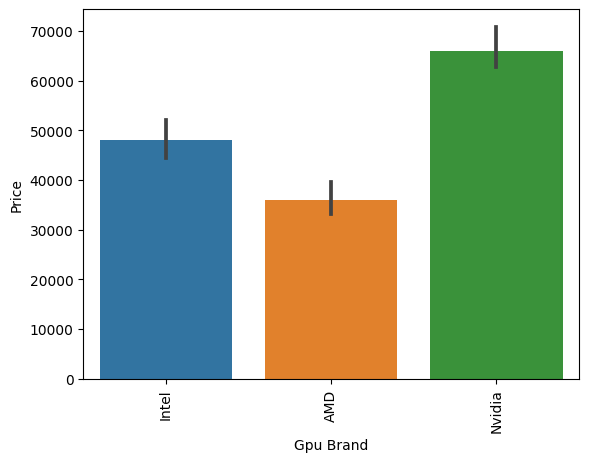

In [58]:
sns.barplot(x=df['Gpu Brand'],y=df['Price'],estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()

In [59]:
df.drop(columns = ['Gpu'] ,inplace = True)

In [60]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS,ppi,cpu brand,HDD,SSD,Gpu Brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


In [61]:
df['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

In [62]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [63]:
df['os'] = df['OpSys'].apply(cat_os)

In [64]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS,ppi,cpu brand,HDD,SSD,Gpu Brand,os
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [65]:
df.drop(columns=['OpSys'],inplace=True)

In [66]:
df.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS,ppi,cpu brand,HDD,SSD,Gpu Brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


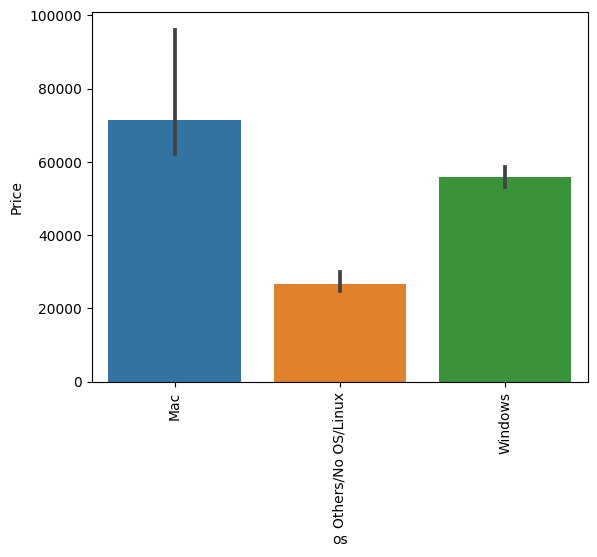

In [67]:
sns.barplot(x=df['os'],y=df['Price'],estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='Weight', ylabel='Price'>

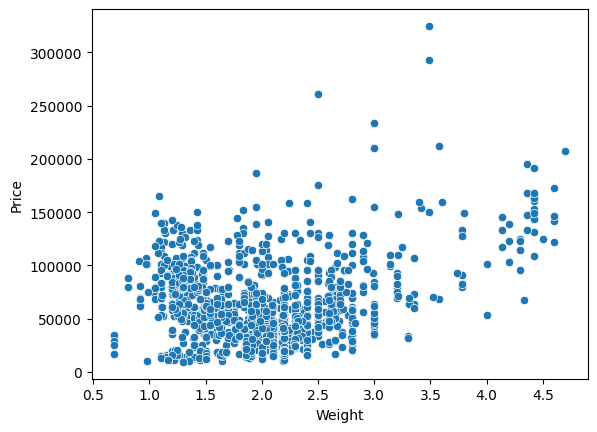

In [68]:
sns.scatterplot(x=df['Weight'],y=df['Price'])

In [69]:
correlation = df['Weight'].corr(df['Price'])
print(correlation)

0.2098669245531431


<Axes: xlabel='Price', ylabel='Density'>

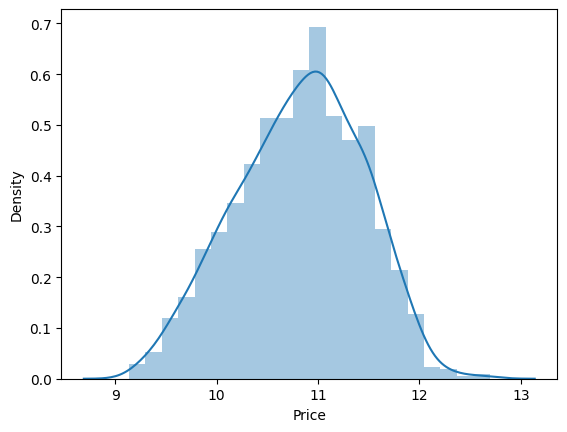

In [70]:
sns.distplot(np.log(df['Price']))

In [71]:
df.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS,ppi,cpu brand,HDD,SSD,Gpu Brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


<h1 style="text-align: justify; font-family: 'WildWest'; font-size:25px; color:Black"> Feature Scaling </h1>
<li> <b>Min Max Scaling</b>,</li>
<li> <b>Robust Scaling</b>,</li>
<li> <b>Standard Scaler</b>,</li>


In [72]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
minmax = scaler.fit_transform(df[['Ram', 'Weight', 'ppi']])
minmax = pd.DataFrame(minmax, columns =['Ram','Weight','ppi'])

scaler = preprocessing.StandardScaler()
standard = scaler.fit_transform(df[['Ram', 'Weight', 'ppi']])
standard = pd.DataFrame(standard, columns =['Ram','Weight','ppi'])

scaler = preprocessing.RobustScaler()
robust = scaler.fit_transform(df[['Ram', 'Weight', 'ppi']])
robust = pd.DataFrame(robust, columns =['Ram','Weight','ppi'])

<h1 style="text-align: justify; font-family: 'WildWest'; font-size:25px; color:Black"> Data Visualization </h1>

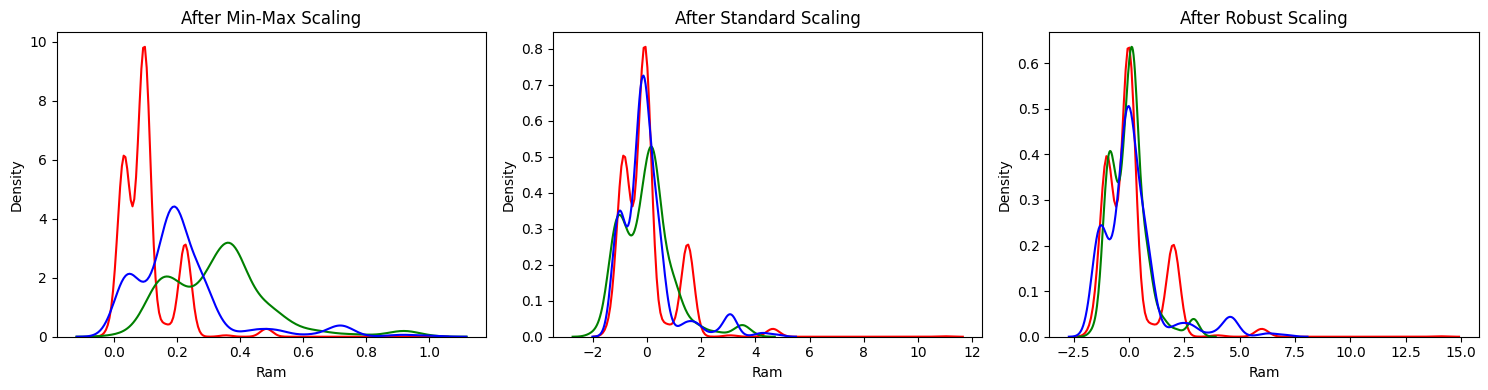

In [73]:
plt.figure(figsize=(15,4))

plt.subplot(1,3,1) 
sns.kdeplot(minmax['Ram'],  color ='red')
sns.kdeplot(minmax['Weight'],  color ='green')
sns.kdeplot(minmax['ppi'],  color ='blue')
plt.title('After Min-Max Scaling')

plt.subplot(1,3,2)
sns.kdeplot(standard['Ram'], color ='red')
sns.kdeplot(standard['Weight'],  color ='green')
sns.kdeplot(standard['ppi'],  color ='blue')

plt.title('After Standard Scaling')


plt.subplot(1,3,3)
sns.kdeplot(robust['Ram'], color ='red')
sns.kdeplot(robust['Weight'],  color ='green')
sns.kdeplot(robust['ppi'],  color ='blue')

plt.title('After Robust Scaling')





plt.tight_layout()
plt.show()

In [74]:
minmax.std()

Ram       0.082019
Weight    0.165904
ppi       0.164460
dtype: float64

In [75]:
standard.std()

Ram       1.000384
Weight    1.000384
ppi       1.000384
dtype: float64

<h1 style="text-align: justify; font-family: 'WildWest'; font-size:25px; color:Black">  Data Preprocessing </h1>


In [76]:
x = df.drop(columns ='Price')
y = np.log(df['Price'])

In [77]:
x

,Company,TypeName,Ram,Weight,Touchscreen,IPS,ppi,cpu brand,HDD,SSD,Gpu Brand,os
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,0,0,111.935204,other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows


In [78]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1302, dtype: float64

<h1 style="text-align: justify; font-family: 'WildWest'; font-size:25px; color:Black">Train_Test_split</h1>



In [79]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.15,random_state=2)

In [80]:
X_train

,Company,TypeName,Ram,Weight,Touchscreen,IPS,ppi,cpu brand,HDD,SSD,Gpu Brand,os
183,Toshiba,Notebook,8,2.00,0,0,100.454670,Intel Core i5,0,128,Intel,Windows
1141,MSI,Gaming,8,2.40,0,0,141.211998,Intel Core i7,1000,128,Nvidia,Windows
1049,Asus,Netbook,4,1.20,0,0,135.094211,other Intel Processor,0,0,Intel,Others/No OS/Linux
1020,Dell,2 in 1 Convertible,4,2.08,1,1,141.211998,Intel Core i3,1000,0,Intel,Windows
878,Dell,Notebook,4,2.18,0,0,141.211998,Intel Core i5,1000,128,Nvidia,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,2.20,0,0,100.454670,Intel Core i3,500,0,Nvidia,Windows
299,Asus,Ultrabook,16,1.63,0,0,141.211998,Intel Core i7,0,512,Nvidia,Windows
493,Acer,Notebook,8,2.20,0,0,100.454670,AMD Processor,1000,0,AMD,Windows
527,Lenovo,Notebook,8,2.20,0,0,100.454670,Intel Core i3,2000,0,Nvidia,Others/No OS/Linux


<h1 style="text-align: justify; font-family: 'WildWest'; font-size:25px; color:Black">Model Building</h1>

In [81]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.model_selection import cross_val_score


In [82]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

<h1 style="text-align: justify; font-family: 'WildWest'; font-size:25px; color:Black">Displaying a Complex Pipeline Chaining a Column Transformer</h1>

<h1 style="text-align: justify; font-family: 'WildWest'; font-size:25px; color:Black">Apply Linear Regression</h1>



In [83]:
numeric_preprocessing =Pipeline(steps=[("imputation_mean",SimpleImputer(missing_values = np.nan ,strategy ="mean")),
               ("scalar",StandardScaler())])


In [84]:
numeric_preprocessing

Pipeline(steps=[('imputation_mean', SimpleImputer()),
                ('scalar', StandardScaler())])

In [85]:
Categorical_preprocessing =Pipeline(steps=[("imputation_constant" ,SimpleImputer(fill_value ="missing" ,strategy ="constant")),
                                            ("onehot" ,OneHotEncoder(handle_unknown ="ignore"))])

In [86]:
Categorical_preprocessing 

Pipeline(steps=[('imputation_constant',
                 SimpleImputer(fill_value='missing', strategy='constant')),
                ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [87]:
preprocessor = ColumnTransformer([("categorical" ,Categorical_preprocessing,["Company" ,"TypeName" ,"cpu brand" ,"Gpu Brand" ,"os"]),
                                  ("numeric" ,numeric_preprocessing,["Ram","Weight","Touchscreen","IPS","ppi","HDD","SSD"])])

In [88]:
preprocessor

ColumnTransformer(transformers=[('categorical',
                                 Pipeline(steps=[('imputation_constant',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Company', 'TypeName', 'cpu brand',
                                  'Gpu Brand', 'os']),
                                ('numeric',
                                 Pipeline(steps=[('imputation_mean',
                                                  SimpleImputer()),
                                                 ('scalar', StandardScaler())]),
                                 ['Ram', 'Weight', 'Touchscreen', 'IPS', 'ppi',
                                  'HDD', 'SSD'])])

In [89]:
pipe = Pipeline(
    steps=[("preprocessor", preprocessor), ("Regressor", LinearRegression())])

In [90]:
from sklearn.pipeline import make_pipeline
pipe=make_pipeline(preprocessor,LinearRegression())

In [91]:
pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('imputation_constant',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Company', 'TypeName',
                                                   'cpu brand', 'Gpu Brand',
                                                   'os']),
                                                 ('numeric',
                                                  Pipeline(steps=[('imputation_mean',
                                                                   SimpleImputer()),
                                                                  ('scalar',
                                                                   StandardScaler())]),
                                                  ['Ram', 'Weight',
                                                   'Touchscreen', 'IPS', 'ppi',
                                                   'HDD', 'SSD'])])),
                ('linearregression', LinearRegression())])

<h1 style="text-align: justify; font-family: 'WildWest'; font-size:25px; color:Black">Perform cross-validation on the training data</h1>



In [92]:
#Linear Regressor
cross_val_scores=cross_val_score(pipe,X_train,y_train,scoring ='r2',cv=5)
np.mean(cross_val_scores)
print('cross_val_score',cross_val_scores)
print('mean of cross_val_score',np.mean(cross_val_scores))



cross_val_score [0.75222786 0.84725668 0.8494126  0.82870074 0.81190108]
mean of cross_val_score 0.8178997906789164



**Same like linear regreesion it trained other model like SVR ,RFRegression ,DecisionTreeRegressor ,Lasso,Ridge Regression model.so all model not creating pipleine again instead of it uses object of pipeline ("pipe")  that was created in linear regression for all model ,
also perform cross validation and finding mean squared error**

<h1 style="text-align: justify; font-family: 'WildWest'; font-size:"4"; color:Black">Ridge Regression</h1>


In [93]:
#Ridge
pipe = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", Ridge(alpha =10))])
    
    
cross_val_scores =cross_val_score(pipe,X_train,y_train,scoring ='r2',cv=5)
np.mean(cross_val_scores)

print('cross_val_score',cross_val_scores)
print('mean of cross_val_score',np.mean(cross_val_scores))



cross_val_score [0.75013061 0.83607944 0.84104438 0.81452927 0.80937847]
mean of cross_val_score 0.8102324346037696


<h1 style="text-align: justify; font-family: 'WildWest'; font-size:25px; color:Black">Lasso Regression</h1>


In [94]:
#Lasso
pipe = Pipeline(
    steps=[("preprocessor", preprocessor), ("Regressor", Lasso(alpha =0.001))])

cross_val_scores=cross_val_score(pipe,X_train,y_train,scoring ='r2',cv=5)
np.mean(cross_val_scores)

print('cross_val_score',cross_val_scores)
print('mean of cross_val_score',np.mean(cross_val_scores))



cross_val_score [0.75060119 0.84019452 0.84576538 0.81478451 0.80916372]
mean of cross_val_score 0.8121018629970644


<h1 style="text-align: justify; font-family: 'WildWest'; font-size:25px; color:Black">Support Vector Regression (SVR)</h1>


In [95]:
#SVR
pipe = Pipeline(
    steps=[("preprocessor", preprocessor), ("Regreesor", SVR(kernel='rbf',C=10000,epsilon=0.1))])

cross_val_scores =cross_val_score(pipe,X_train,y_train,scoring ='r2',cv=5)
np.mean(cross_val_scores)

print('cross_val_score',cross_val_scores)
print('mean of cross_val_score',np.mean(cross_val_scores))



cross_val_score [0.48118056 0.52433344 0.54082387 0.13592892 0.29811753]
mean of cross_val_score 0.3960768647524051


<h1 style="text-align: justify; font-family: 'WildWest'; font-size:25px; color:Black">DecisionTreeRegressor</h1>


In [96]:
pipe = Pipeline(
    steps=[("preprocessor", preprocessor), ("Regressor", DecisionTreeRegressor(max_depth=8))])

cross_val_scores =cross_val_score(pipe,X_train,y_train,scoring ='r2',cv=5)
np.mean(cross_val_scores)


print('cross_val_score',cross_val_scores )
print('mean of cross_val_score',np.mean(cross_val_scores ))



cross_val_score [0.78834688 0.77725909 0.80307668 0.8049019  0.78253028]
mean of cross_val_score 0.7912229660465029


<h1 style="text-align: justify; font-family: 'WildWest'; font-size:25px; color:Black">Random Forest Regression</h1>


In [97]:
pipe = Pipeline(
    steps=[("preprocessor", preprocessor), ("Regressor",  RandomForestRegressor(n_estimators=100,
                              random_state=4,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15))])

mse =cross_val_score(pipe,X_train,y_train,scoring ='r2',cv=5)
np.mean(mse)


print('cross_val_score',mse)
print('mean of cross_val_score',np.mean(mse))



cross_val_score [0.853221   0.87892287 0.87542884 0.89421255 0.88437179]
mean of cross_val_score 0.8772314107739131


**We have seen  that after performing cross validation on every model only Random Forest Regressor gives best cross validation score,so we select this model and we gives test data for this model  to perform prediction,make predictions on your test data, and then evaluate the model's performance using the R2 score and MAE**

In [98]:
#RandomForestRegressor
pipe.fit(X_train ,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))


R2 score 0.8922184965153874
MAE 0.1548284762913883


**R2 score is 0.8906898091634, which is close to 1.0.  An R2 score of 0.8907 is quite high,and is performing very well in the regression task.so the performance of Random Forest Regressor very well as compared to other model based on metrics like mean squared erro, cross-validation scores and R2 scores,so it suggests that it is a suitable choice for regression task** 

In [99]:
# Refit the model on full training data
pipe.fit(x, y)
y_pred = pipe.predict(x)

print(' Final Training R2 score',r2_score(y_pred,y))
print(' Final Training MAE',mean_absolute_error(y_pred,y))




 Final Training R2 score 0.9477201617734825
 Final Training MAE 0.10185730580459502


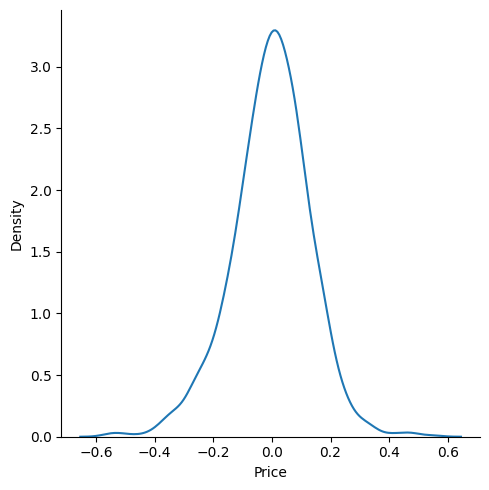

In [100]:
import seaborn as sns 
sns.displot(y_pred-y ,kind='kde')

**It compare the actual  target value with predicted value.and check  whether the residuals should follow a normal distributioor not ,and the KDE plot should resemble a bell-shaped curve.so the result follow normal distriburtion,so  we can say that model will perform well on test data**

ValueError: x and y must be the same size

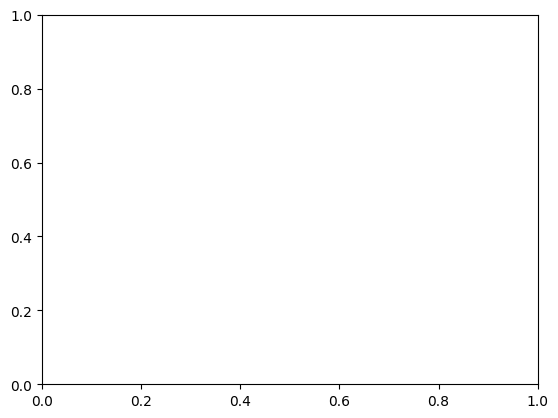

In [101]:
plt.scatter(y_pred,y_test)

 **In this scatter plot predicted values are very close to the observed values,  that would see a strong linear relationship between the points on the scatter plot. In other words, the points would cluster closely to a diagonal line (y = x), indicating that your predictions are accurate**